In [2]:
## Let's begin
from __future__ import print_function
import torch as t

### 3.1.1 Create Tensor

In [3]:
# 指定Tensor形状
a = t.Tensor(2, 3)
a # 数值取决于内存空间地状态

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
# 使用list 创建tensor
b = t.Tensor([[1, 2, 3], [4, 5, 6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [5]:
b.tolist() # 将tensor转化为list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [6]:
b_size = b.size() # 该方法 返回 torch.Size()对象 类似于tuple
b_size

torch.Size([2, 3])

In [7]:
b.numel() # b 中元素总个数， 2*3， 等价于b.nelement()

6

In [8]:
# 创建一个和b一样size 的 tensor
c = t.Tensor(b_size)
# 创建一个元素为2， 3 的 tensor
d = t.Tensor((2, 3))
c, d

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([2., 3.]))

In [9]:
c.shape

torch.Size([2, 3])

In [10]:
c.shape??

### 3.1.2 Normal Tensor Operation

In [11]:
a = t.arange(0, 6)
a.view(2, 3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [12]:
b = a.view(-1, 3)
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [13]:
c = b.unsqueeze(1) # 增加维度
c.shape

torch.Size([2, 1, 3])

In [14]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0)

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [15]:
c.squeeze()

tensor([[0, 1, 2],
        [3, 4, 5]])

In [16]:
a[1] = 100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [17]:
b.resize_(1, 3)
b

tensor([[  0, 100,   2]])

In [18]:
b.resize_(3, 3)
b

tensor([[                0,               100,                 2],
        [                3,                 4,                 5],
        [28710881422737503, 32651561162571873, 32370073300107356]])

### 3.1.3 Index Operation

In [19]:
a = t.randn(3, 4)
a

tensor([[-0.6748,  1.9814, -0.2396,  0.7124],
        [ 0.4534,  0.1886, -1.9909,  0.1469],
        [-0.6298, -0.1504,  2.0977, -0.4990]])

In [20]:
a[0] # 第0行

tensor([-0.6748,  1.9814, -0.2396,  0.7124])

In [21]:
a[:, 0] # 第0列

tensor([-0.6748,  0.4534, -0.6298])

In [22]:
a[0][2] # 第0行第2列 等价于 a[0, 2]

tensor(-0.2396)

In [23]:
a[:2] # 前两行

tensor([[-0.6748,  1.9814, -0.2396,  0.7124],
        [ 0.4534,  0.1886, -1.9909,  0.1469]])

In [24]:
a[:,:2] # 前两列

tensor([[-0.6748,  1.9814],
        [ 0.4534,  0.1886],
        [-0.6298, -0.1504]])

In [25]:
a[1:3,1:3] # 一二行一二列

tensor([[ 0.1886, -1.9909],
        [-0.1504,  2.0977]])

In [26]:
a > 1 # 返回一个 ByteTensor

tensor([[False,  True, False, False],
        [False, False, False, False],
        [False, False,  True, False]])

In [27]:
a[a>1] # 等价于 a.masked_select(a>1)
# 选择结果与原tensor不共享内存

tensor([1.9814, 2.0977])

In [28]:
# 关于 gather 方法的例子
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [30]:
# 选取对角线的元素
index = t.LongTensor([[0, 1, 2, 3]]).t()
print(index)
a.gather(1, index)

tensor([[0],
        [1],
        [2],
        [3]])


tensor([[ 0],
        [ 5],
        [10],
        [15]])

In [31]:
index = t.LongTensor([[3, 2, 1, 0]]).t()
a.gather(1, index)

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [37]:
index = t.LongTensor([[0, 1, 2, 3], [3, 2, 1, 0]]).t()
b = a.gather(1, index)
b

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

In [35]:
a.view(16, 1).squeeze()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [48]:
# 将两个对角元素放到指定位置
b = b.float()
c = t.zeros(4, 4)
c.scatter_(1, index, b)

tensor([[ 0.,  0.,  0.,  3.],
        [ 0.,  5.,  6.,  0.],
        [ 0.,  9., 10.,  0.],
        [12.,  0.,  0., 15.]])

### 3.1.4 Advanced Index

In [49]:
x = t.arange(27).view(3, 3, 3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [50]:
x[[1, 2], [1, 2], [2, 0]]

tensor([14, 24])

In [51]:
x[[2, 1, 0], 0, 1]

tensor([19, 10,  1])

In [52]:
x[[0, 2], ...]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

### 3.1.5 Tensor 类型

In [53]:
# t.set_default_tensor_type('torch.IntTensor')
# 当前版本只支持浮点数为默认类型

TypeError: only floating-point types are supported as the default type

In [55]:
a = t.Tensor(2, 3)
b = a.int()
b

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [56]:
c = a.type_as(b)
c

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [57]:
d = a.new(2, 3)
d

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [8.0439e+20, 5.3973e-05, 1.0140e-11]])

In [58]:
a.new??

### 3.1.6 Elemwise Operation

### 3.1.7 归并操作

### 3.1.8 比较

### 3.1.9 线性代数

### 3.1.10 Tensor 与 Numpy

### 3.1.11 内部结构
    + tensor 分为 头信息区（Tensor）和储存区（Storage）
    + 一般操作的主要是tensor的头信息区 省内存 速度快
    + 若有些方法导致不连续可使用 tensor.contiguous 转为连续

In [59]:
a = t.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [60]:
b = a.view(2, 3)
b.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [61]:
id(b.storage) == id(a.storage)

True

### 3.1.12 持久化

In [62]:
if t.cuda.is_available():
    a = a.cuda(1)
    t.save(a, 'a.pth')
    # 加载为b，储存在GPU1上
    b = t.load('a.pth')
    # 加载为c， 储存于CPU
    c = t.load('a.pth', map_location=lambda storage, loc:storage)
    # 加载为d，储存在GPU0上
    d = t.load('a.pth', map_loaction={'cuda:1': 'cuda:0'})

RuntimeError: CUDA error: invalid device ordinal

### 3.1.13 向量化 Vectoritation
**我们要极力避免使用python原生 for 循环**

In [64]:
def for_loop_add(x, y):
    result = []
    for i, j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)

In [65]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 t.add(x, y)

The slowest run took 6.08 times longer than the fastest. This could mean that an intermediate result is being cached.
1.12 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 227.14 times longer than the fastest. This could mean that an intermediate result is being cached.
82 µs ± 195 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 20000000, out=b) # 64bit的LongTensor不会溢出
b[-1], b[-2]
# 我吐了，人家没溢出阿

tensor(19999999) tensor(19999998)


(tensor(19999999), tensor(19999998))

In [67]:
a = t.randn(2, 3)
a

tensor([[ 0.4587, -1.0485, -1.9298],
        [ 2.5727,  1.8603,  1.8399]])

In [68]:
t.set_printoptions(precision=10)
a

tensor([[ 0.4586771429, -1.0485433340, -1.9297511578],
        [ 2.5726988316,  1.8603475094,  1.8398686647]])

### 3.1.14 E.g. 线性回归 

In [69]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [70]:
# 设置随机数种子， 保证在不同计算机上运行时下面的输出一致
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    '''产生随机数据：y = x * 2 + 3， 加上噪声'''
    x = t.randn(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

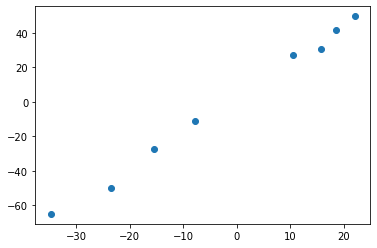

In [71]:
# 可视化 x， y 分布
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [ ]:
# 随机初始化参数
w = t.rand(1, 1)
b = t.zeros(1, 1)
lr = 0.01

for ii in range(20000):
    x, y = get_fake_data()
    
    # forward
    loss = n.sum((y - x * w - b) ** 2) / 2
    
    # backward
    